# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: Link - https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

Data Dictionary:

age - Age of the patient

sex - Sex of the patient 0 = F, 1 = M

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable



Task: To perform EDA and predict if a person is prone to a heart attack or not.


Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None)

In [3]:
heart_df = pd.read_csv(r"C:\Users\nidhi\OneDrive\Desktop\LaunchCode-Project-HeartAttack\heart.csv")
o2s_df = pd.read_csv(r"C:\Users\nidhi\OneDrive\Desktop\LaunchCode-Project-HeartAttack\o2Saturation.csv")

In [4]:
print("The shape of the dataset is : ", heart_df.shape)

The shape of the dataset is :  (303, 14)


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [5]:
#Viewing the first 5 rows of each dataset
print('Data From Heart Dataset \n')
heart_df.head()

print('\n Data From O2S Dataset  \n')
o2s_df.head()

Data From Heart Dataset 



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



 Data From O2S Dataset  



,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [6]:

print('Data From Heart Dataset \n')
heart_df.info()

print('\n Data From O2S Dataset  \n')
o2s_df.info()

Data From Heart Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

 Data From O2S Dataset  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  ----------

In [7]:
print("The shape of the Heart dataset is : ", heart_df.shape)
print('\n')
print("The shape of the O2Saturation dataset is : ", o2s_df.shape)

The shape of the Heart dataset is :  (303, 14)


The shape of the O2Saturation dataset is :  (3585, 1)


In [8]:
#Checking the number of unique values in each column-

dict = {}
for i in list(heart_df.columns):
    dict[i] = heart_df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [9]:
#Separating the columns in categorical and continuous

cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [10]:
#Summary statistics

heart_df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [11]:
#Missing values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Chest pain type')

Text(0.5, 1.0, 'Chest Pain type at Different Age Range')

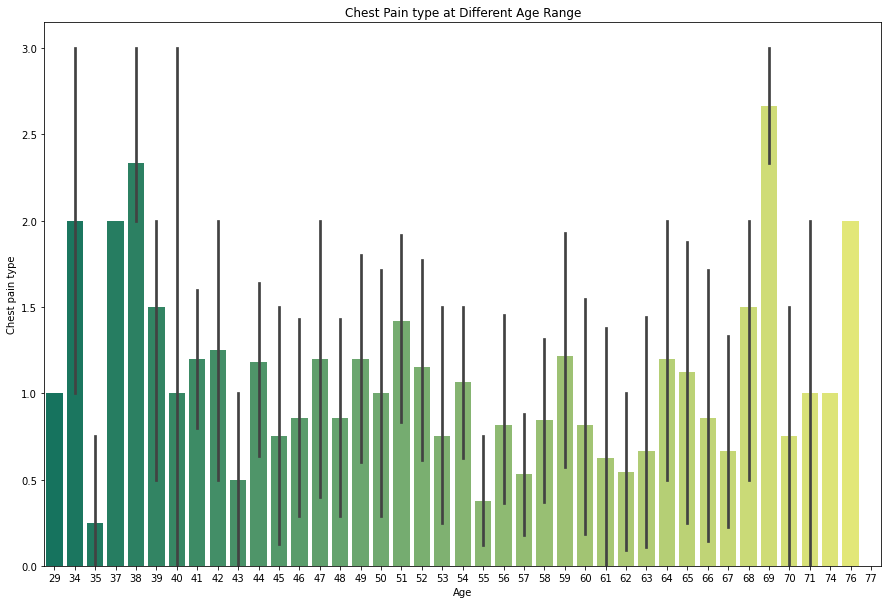

In [20]:
plt.figure(figsize =(15,10))
ax=sns.barplot(x = heart_df['age'],y = heart_df['cp'] ,data=heart_df,palette ="summer")
plt.xlabel("Age")
plt.ylabel("Chest pain type")
#plt.xticks(rotation = 90)
plt.title("Chest Pain type at Different Age Range")




Breakdown of gender


Number of people having sex as 1(M) are 96 and Number of people having sex as 0(F) are 207


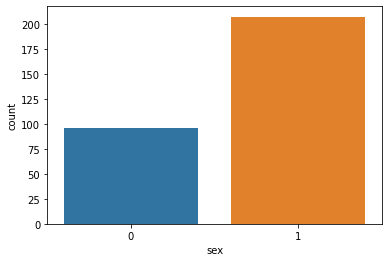

People having gender as 0 are more than twice the people having gender as 1


In [31]:
x=(heart_df.sex.value_counts())
print(f'Breakdown of gender')
print('\n')
print(f'Number of people having sex as 1(M) are {x[0]} and Number of people having sex as 0(F) are {x[1]}')
p = sns.countplot(data=heart_df, x="sex")
plt.show()

print(f'People having gender as 0 are more than twice the people having gender as 1')

Breakdown for Chest Pain


0    143
2     87
1     50
3     23
Name: cp, dtype: int64


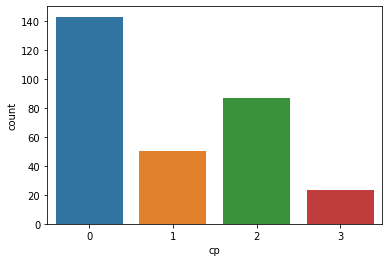

In [30]:
print(f'Breakdown for Chest Pain')
print('\n')

x=(heart_df.cp.value_counts())
print(x)
p = sns.countplot(data=heart_df, x="cp")
plt.show()

1.It can be observed people have chest pain of type 0 i.e 'Typical Angina' is the highest.
2.It can be observed people have chest pain of type 3 i.e 'Asymptomatic' is the lowest
3.It can also be observed people with chest pain of type 0 is almost 50% of all the people.

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

1. Not Much every thing looks good.
2. Not really but sort of, hard to remember naming convention.
3. yes, for sure rename some column names.